In [1]:
result_file = 'result.csv'
model = 'nyc-taxi-green-dec-2016_d10_l477_n953_20241009123219'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
759,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,0,0.000000,nyc-taxi-green-dec-2016,1G,1,2.329748
760,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,1,0.415543,nyc-taxi-green-dec-2016,1G,1,2.073282
761,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,2,0.415543,nyc-taxi-green-dec-2016,1G,1,2.004167
762,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,1,0.826135,nyc-taxi-green-dec-2016,1G,1,2.170908
763,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,2,0.826135,nyc-taxi-green-dec-2016,1G,1,2.159623
764,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,1,1.236728,nyc-taxi-green-dec-2016,1G,1,1.992692
765,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,2,1.236728,nyc-taxi-green-dec-2016,1G,1,1.917632
766,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,1,1.647320,nyc-taxi-green-dec-2016,1G,1,1.806091
767,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,2,1.647320,nyc-taxi-green-dec-2016,1G,1,1.611588
768,nyc-taxi-green-dec-2016_d10_l477_n953_20241009...,1,2.057912,nyc-taxi-green-dec-2016,1G,1,1.619714


In [3]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 2.398738783535858)

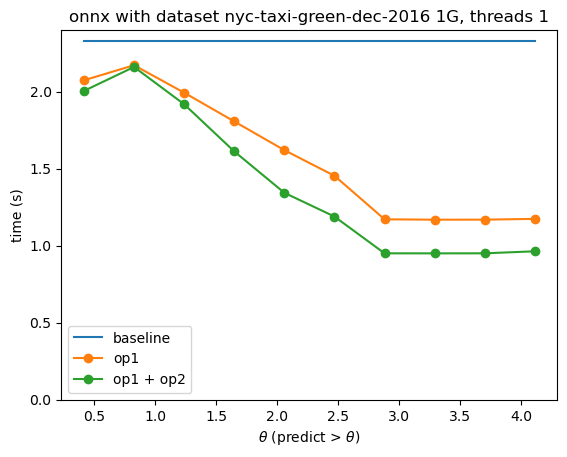

In [4]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='baseline')
plt.plot(x, y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, y2, marker='o', label='op1 + op2')
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 2.5251884632334516)

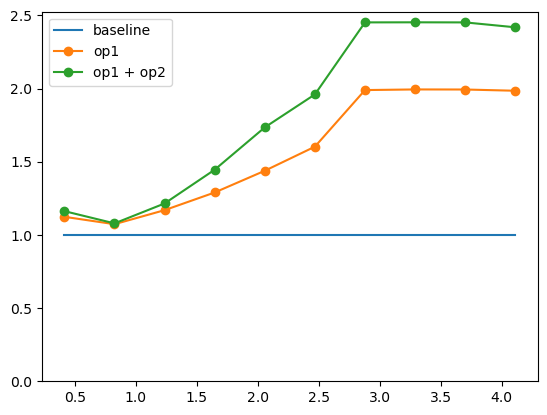

In [5]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)